<a href="https://colab.research.google.com/github/HarshithaLavudia/Medical-Insurance-Prediction/blob/main/Medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Medical_insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

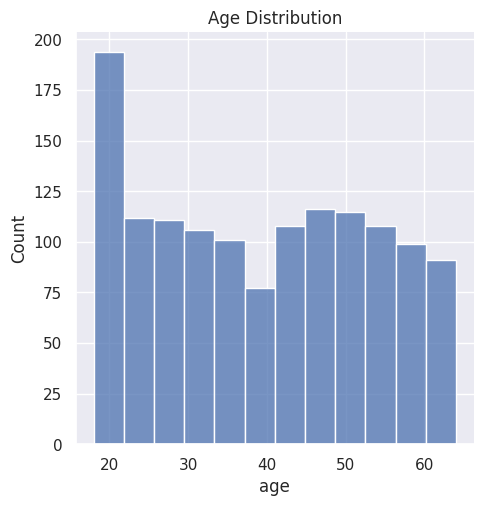

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

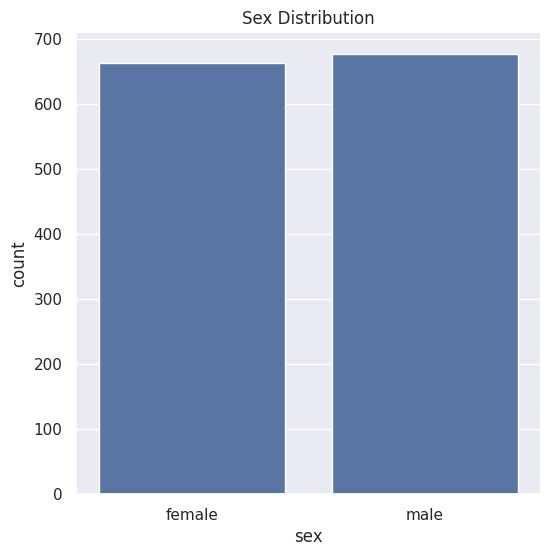

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

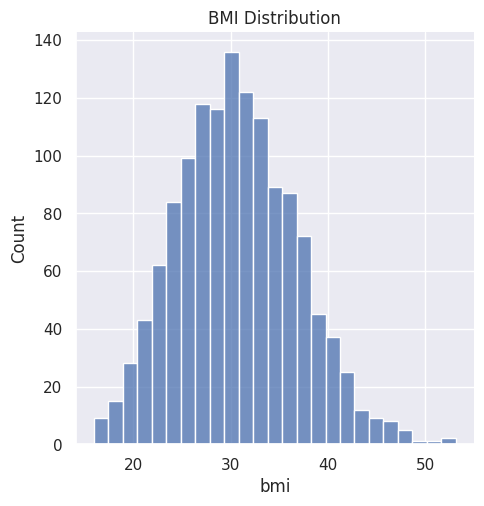

In [10]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [11]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

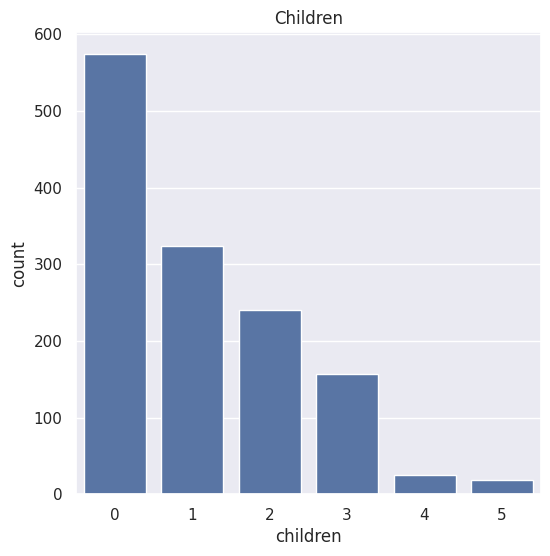

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

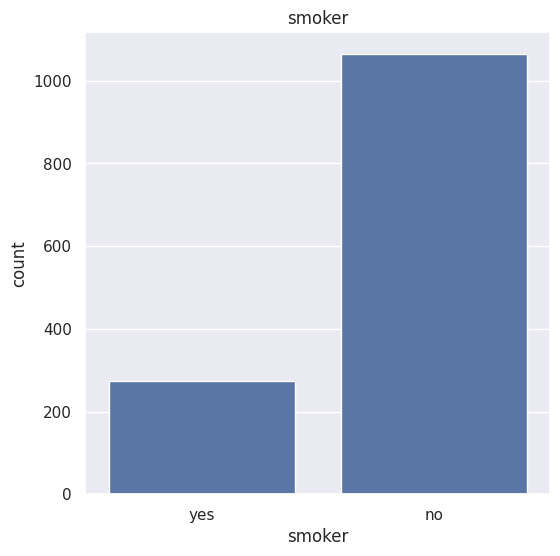

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

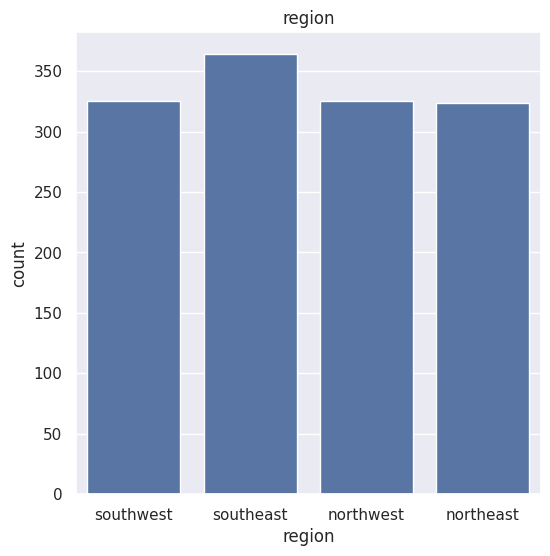

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

<Figure size 600x600 with 0 Axes>

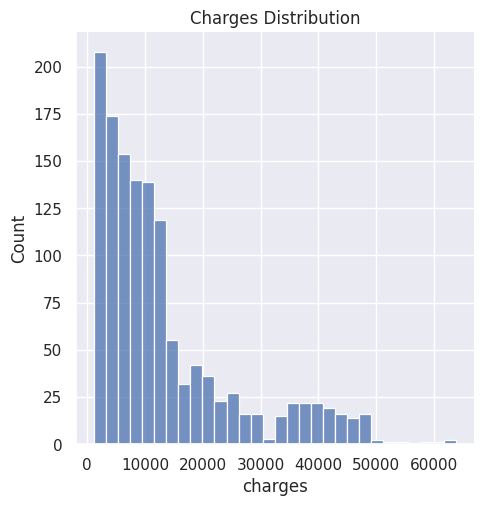

In [17]:
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [18]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [19]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [20]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
lr_model = LinearRegression()

In [26]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
y_pred1 = lr_model.predict(X_test)

In [28]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, f1_score, mean_squared_error, mean_absolute_error, r2_score


In [29]:
lr_mse = mean_squared_error(Y_test, y_pred1)
lr_rmse = mean_squared_error(Y_test, y_pred1, squared=False)
lr_mae = mean_absolute_error(Y_test, y_pred1)
lr_r2 = r2_score(Y_test, y_pred1)

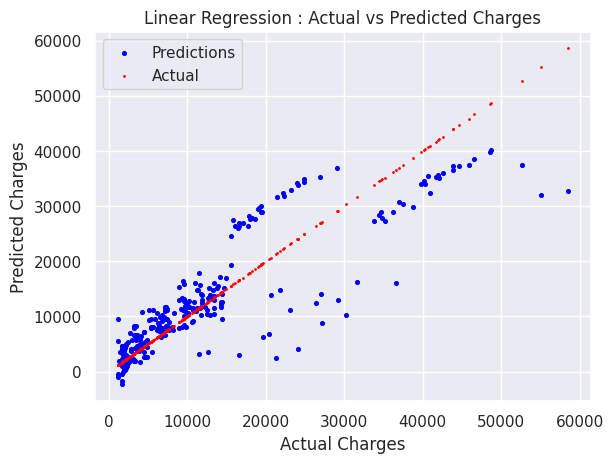

Mean Squared Error (MSE): 38337035.48643885
Root Mean Squared Error (RMSE): 6191.690842285236
Mean Absolute Error (MAE): 4267.213826730733
R-squared (R2) Score: 0.7447273869684076


In [30]:
plt.scatter(Y_test, y_pred1, color='blue', label='Predictions', s=7)
plt.scatter(Y_test, Y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression : Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', lr_mse)
print('Root Mean Squared Error (RMSE):', lr_rmse)
print('Mean Absolute Error (MAE):', lr_mae)
print('R-squared (R2) Score:', lr_r2)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [33]:
y_pred2 = rf_model.predict(X_test)

In [34]:
rf_mse = mean_squared_error(Y_test, y_pred2)
rf_rmse = mean_squared_error(Y_test, y_pred2, squared=False)
rf_mae = mean_absolute_error(Y_test, y_pred2)
rf_r2 = r2_score(Y_test, y_pred2)

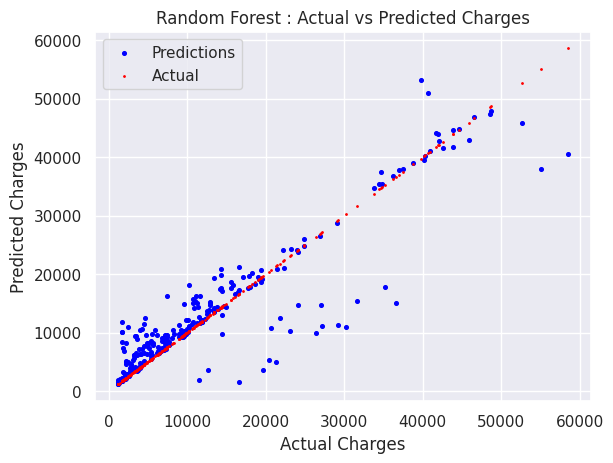

Mean Squared Error (MSE): 24732490.054637477
Root Mean Squared Error (RMSE): 4973.177058444378
Mean Absolute Error (MAE): 2753.453173259441
R-squared (R2) Score: 0.835315191096127


In [35]:
plt.scatter(Y_test, y_pred2, color='blue', label='Predictions', s=7)
plt.scatter(Y_test, Y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest : Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('Mean Absolute Error (MAE):', rf_mae)
print('R-squared (R2) Score:', rf_r2)

In [36]:
input_data = (19, 1, 27.9, 0, 0, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[17042.6571082]
The insurance cost is USD  17042.657108200026


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
